Active Contours using Level Sets
================================
Using Gabriel PeyrÃ© numerical tours toolboxes

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

In [1]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *

import warnings
warnings.filterwarnings('ignore')

Managing level set functions
----------------------------
In the level set formalism, the evolution of some curve $ (\ga(t))_{t=0}^1 $
is computed by evolving the
zero level of a function $\phi : \RR^2 \rightarrow \RR $
$$ \enscond{\ga(s)}{ s \in [0,1] } = \enscond{x \in \RR^2}{\phi(x)=0}. $$
This corresponds to replacing the parameteric representation $\ga$ of
the curve by an implicit representation. This requires an additional
dimension (and hence more storage) but ease the handling of topological
change of the curve during the evolution.


Discretazion size $n \times n$ of the domain $[0,1]^2$.

In [2]:
n = 200
Y,X = np.meshgrid(np.arange(1,n+1), np.arange(1,n+1))

One can create a circular shape by using the signed distance function to
a circle
$$ \phi_1(x) = \sqrt{ (x_1-c_1)^2 + (x_2-c_2)^2 } - r $$
where $r>0$ is the radius and $c \in \RR^2$ the center.

In [3]:
r = n/3
c = np.array([r,r]) + 10
phi1 = np.sqrt((X-c[0])**2 + (Y-c[1])**2) - r

One can create a square shape as well
$$\phi_2(x)=\max(|x-c_1|,|x-c_2|)-r$$
where $c\in\RR^2$ is the center and $r$ the half length of one edge.

In [4]:
r = n/3.
c = n - 10 - np.array([r,r])
phi2 = np.maximum(abs(X-c[0]), abs(Y-c[1])) - r

Display the curves associated to $\phi_1$ and $\phi_2$.

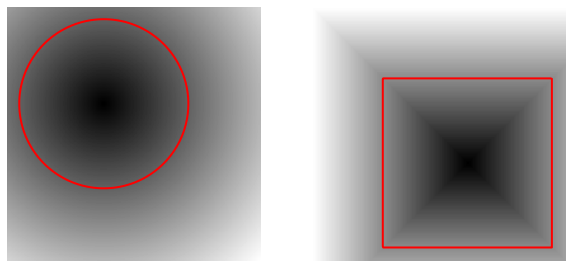

In [5]:
from nt_toolbox.plot_levelset import *
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plot_levelset(phi1)

plt.subplot(1,2,2)
plot_levelset(phi2)

In [6]:
Tmax=1000
tau=0.5
niter = int(Tmax/tau)
phi = np.copy(phi1)

We now compute the right hand side of the evolution equation.


Compute the gradient $\nabla \phi$. We use centered differences for the discretization of the gradient.

In [7]:
from nt_toolbox.grad import *
g1 = grad(phi, order=2)

Norm $\norm{\nabla \phi}$ of the gradient.

In [8]:
eps = np.finfo(float).eps
d = np.maximum(eps*np.ones([n,n]), np.sqrt(np.sum(g1**2, 2)))

Normalized gradient and curvature.

In [9]:
g = g1/np.repeat(d[:,:,np.newaxis], 2, 2)
from nt_toolbox.div import *
K = - d*div(g[:,:,0], g[:,:,1], order=2)

Descent algorithm

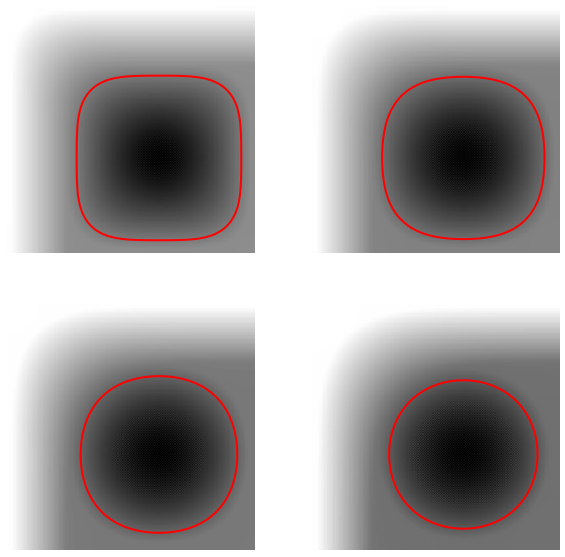

In [10]:
plt.figure(figsize=(10,10))
phi = np.copy(phi2) #initialization
eps = np.finfo(float).eps
k = 0

for i in range(1,niter+1):
    g1 = grad(phi, order=2)
    d = np.maximum(eps*np.ones([n,n]), np.sqrt(np.sum(g1**2, 2)))
    g = g1/np.repeat(d[:,:,np.newaxis], 2, 2)
    K = d*div(g[:,:,0], g[:,:,1], order=2)
    phi = phi + tau*K
    if i % int(niter/4.) == 0:
        k = k + 1
        plt.subplot(2, 2, k)
        plot_levelset(phi)

Levelset Re-distancing
----------------------
During PDE resolution, a level set function $\phi$ might become
ill-conditionned, so that the zero crossing is not sharp enough.
The quality of the level set function is restored by computing the
signed distance function to the zero level set.



This corresponds to first extracting the zero level set
$$ \Cc = \enscond{x \in \RR^2 }{\phi(x)=0},  $$
and then solving the following eikonal equation PDE on $\tilde \phi$
(in viscosity sense)
$$ \norm{\nabla \tilde \phi(x)} = 1
      \qandq \forall y \in \Cc, \tilde\phi(y)=0. $$
The one can replace $\phi$ by $\text{sign}(\phi(x))\tilde \phi(x)$
which is the signed distance function to $\Cc$.


We set $\phi$ as a signed indicator function to a set, which is a level-set function for this set, but $\phi$ is not a signed distance function.

In [11]:
r = n/3
c = np.array([r,r]) + 10
phi2 = (np.sqrt((X-c[0])**2 + (Y-c[1])**2) - r<0)-0.5

Loading the fast-marching algorithm and call it (need scikit-fmm to be installed, e.g by "conda install -c conda-forge scikit-fmm")

In [12]:
from nt_toolbox.perform_redistancing import *
phi2r = perform_redistancing(phi2)

Plot the result

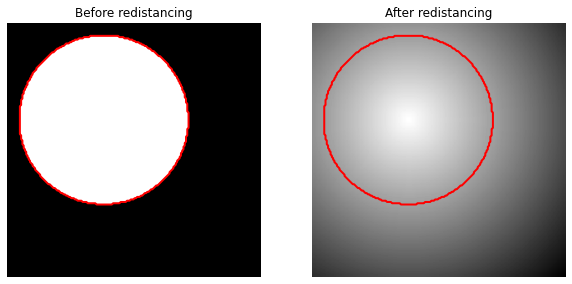

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plot_levelset(phi2)
plt.title("Before redistancing")

plt.subplot(1,2,2)
plot_levelset(phi2r)
plt.title("After redistancing")

plt.show()

Edge-based Segmentation with Geodesic Active Contour
----------------------------------------------------
Geodesic active contours compute local minimum of a weighted geodesic
distance that attract the curve toward the features of the background
image.

First we load an image $I \in \RR^{n \times n}$ to segment, with fixed $n$.

In [14]:
n = 200
I = rescale(load_image("bird.jpg", n))
#I = rescale(load_image("nt_toolbox/data/cortex.bmp", n))
#I = rescale(load_image("data/TwoObj.bmp", n))
#I = rescale(load_image("data/ThreeObj.bmp", n))

Given a background image $I$ to segment, one needs to compute
an edge-stopping function $g$.
It should be small in area of high gradient, and high in area of large gradient.


We use here
$$ g(x) = \al + \frac{\be}{\epsilon + \norm{\nabla I(x)} }$$

Compute the magnitude of the gradient $d_0(x) = \norm{\nabla I(x)}$.

In [15]:
g = grad(I, order=2)
d0 = np.sqrt(np.sum(g**2, 2))

Parameter $\epsilon>0$.

In [16]:
epsilon = 1e-1

We set the $\al$ and $\be$ parameters to adjust the overall values of $g$
(equivalently we use the function rescale). Plot the initial image and stopping function g.

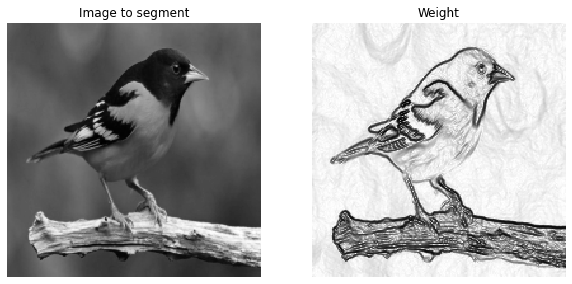

In [17]:
g = rescale(1./(epsilon + d0),0.1,1)
#g = rescale(-d0, 0.1, 1)
plt.figure(figsize=(10,5))
imageplot(I, "Image to segment", [1,2,1])
imageplot(g, "Weight", [1,2,2])

Start from and initial curve surrounding the area of interest, and display it.

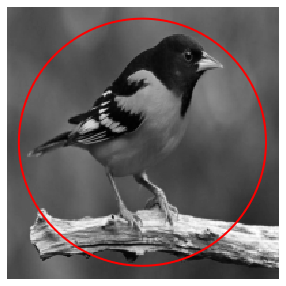

In [18]:
# create it
Y,X = np.meshgrid(np.arange(1,n+1), np.arange(1,n+1))
r = n/2.2
c = np.asarray([n,n])/2
#phi0 = np.maximum(abs(X-c[0]), abs(Y-c[1])) - r
phi0 = np.sqrt((X-c[0])**2 + (Y-c[1])**2) - r
# display it
plt.figure(figsize=(5,5))
plot_levelset(phi0, 0, I)

The geodesic active contour minimizes a weighted length of curve
$$ \umin{\phi} \int_\Omega g(\nabla I) \norm{\nabla\phi} \frac1\varepsilon\zeta(\frac\phi\varepsilon) d x $$


The level set implementation of the gradient descent of this energy reads
$$ \pd{\phi_t}{t} = G(\phi_t)
  \qwhereq G(\phi) = -\norm{\nabla \phi} \text{div}\pa{
          g(\nabla I) \frac{\nabla \phi}{\norm{\nabla \phi}}
  } $$


This is implemented using a gradient descent scheme.
$$ \phi^{(\ell+1)} = \phi^{(\ell)} - \tau G(\phi^{(\ell)}), $$
where $\tau>0$ is small enough.


Gradient step size $\tau>0$, final time and number of iteration of the algorithm.

In [19]:
tau = .4
Tmax = 1000
niter = int(Tmax/tau)

Initial distance function $\phi^{(0)}=\phi_0$.

In [20]:
phi = np.copy(phi0)

Geodesic active contours gradient descent.

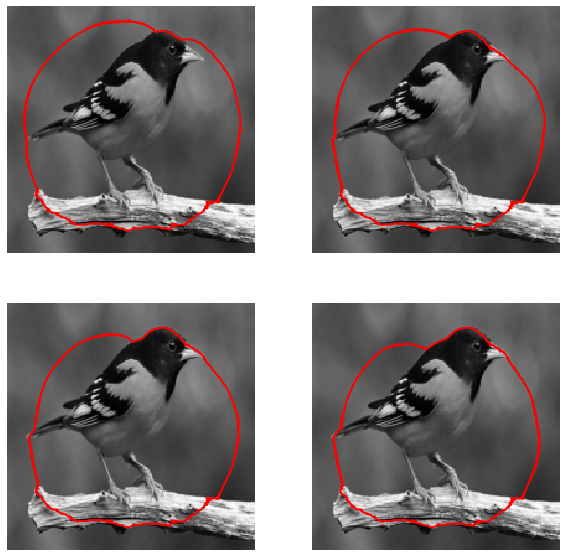

In [21]:
plt.figure(figsize=(10,10))
k = 0
gg = grad(g, order=2)

for i in range(1,niter+1):
    gp = grad(phi, order=2)
    d = np.maximum(eps*np.ones([n,n]), np.sqrt(np.sum(gp**2, 2)))
    gn = gp/np.repeat(d[:,:,np.newaxis], 2, 2)
    G = g*d*div(gn[:,:,0], gn[:,:,1], order=2) + np.sum(gg*gp,2)
    phi = phi + tau*G
    if i % 30 == 0:
        phi = perform_redistancing(phi)
    if i % int(niter/4.) == 0:
        k = k + 1
        plt.subplot(2, 2, k)
        plot_levelset(phi,0,I)

Region-based Segmentation with Chan-Vese 
-----------------------------------------
Chan-Vese active contours corresponds to a region-based energy
that looks for a piecewise constant approximation of the image.


The energy to be minimized is
$$ \umin{\phi}
      L(\phi) +
      \la \int_{\phi(x)>0} \abs{f_0(x)-c_1}^2 d x   +
      \la \int_{\phi(x)<0} \abs{f_0(x)-c_2}^2 d x
$$
where $L$ is the length of the zero level set of $\phi$.
Note that here $(c_1,c_2) \in \RR^2$ are assumed to be known.

In [22]:
n = 200
I = rescale(load_image("bird.jpg", n))
#I = rescale(load_image("nt_toolbox/data/cortex.bmp", n))
#I = rescale(load_image("data/TwoObj.bmp", n))
#I = rescale(load_image("data/ThreeObj.bmp", n))

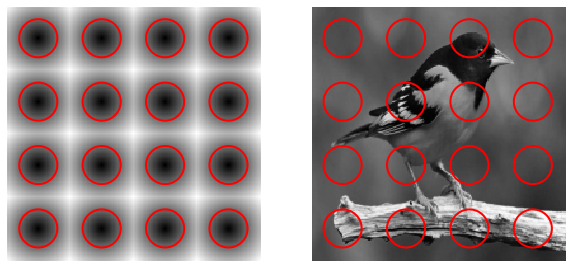

In [23]:
plt.figure(figsize=(10,5))
Y,X = np.meshgrid(np.arange(1,n+1), np.arange(1,n+1))
k = 4 #number of circles
r = .3*n/k
phi0 = np.zeros([n,n])+np.float("inf")

for i in range(1,k+1):
    for j in range(1,k+1):
        c = (np.asarray([i,j]) - 1)*(n/k) + (n/k)*.5
        phi0 = np.minimum(phi0,np.sqrt(abs(X-c[0])**2 + abs(Y-c[1])**2) - r)
        
plt.subplot(1,2,1)
plot_levelset(phi0,0)
plt.subplot(1,2,2)
plot_levelset(phi0, 0, I)

Parameter $\la$, $c_1$, $c_2$, $tau$.

In [24]:
lambd=2
c1=0.7
c2=0.
tau=.5

The minimizing flow for the CV energy reads
$$ \pd{\phi_t}{t} = - G(\phi_t) $$
where
$$ G(\phi) =
- \norm{\nabla \phi} \text{div}\pa{
	\frac{\nabla \phi}{\norm{\nabla \phi}}
} + \la (f_0-c_1)^2 - \la (f_0-c_2)^2. $$

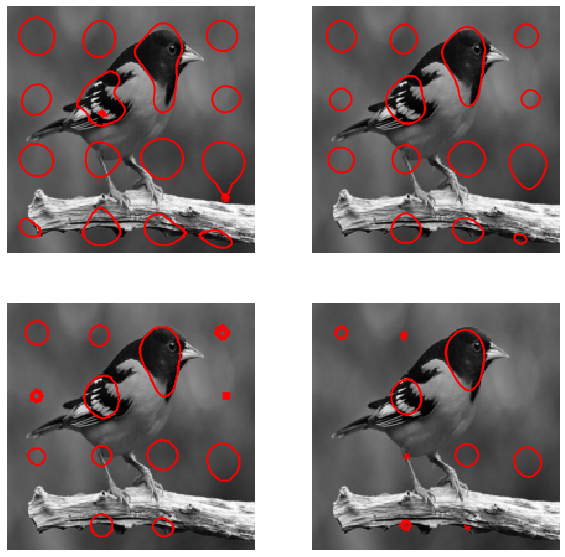

In [26]:
Tmax = 100
niter = int(Tmax/ tau)
plt.figure(figsize=(10,10))
phi = np.copy(phi0)
k = 0

for i in range(1,niter+1):
    gD = grad(phi, order=2)
    d = np.maximum(eps*np.ones([n,n]), np.sqrt(np.sum(gD**2, 2)))
    g = gD/np.repeat(d[:,:,np.newaxis], 2, 2)
    G = d*div(g[:,:,0], g[:,:,1], order=2) - lambd*(I-c1)**2 + lambd*(I-c2)**2
    phi = phi + tau*G
    if i % 30 == 0:
        phi = perform_redistancing(phi)
    if i % int(niter/4.) == 0:
        k = k + 1
        plt.subplot(2, 2, k)
        plot_levelset(phi,0,I)